# MarketWatch
- MarketWatch is a Machine Learning project that implements a decision tree models to capture patterns from the provided data and predicts "SalePrices" for new homes based on the trained data.

In [ ]:
# load in the tidyverse package
library(tidyverse)

# read the data and store data in a tibble
GTA_data <- read_csv("../input/train.csv") 

# make sure Condition1 is a factor & not a char
GTA_data$Condition1 <- as.factor(GTA_data$Condition1)

# Your turn: summarize the iowa_data dataframe
summary(GTA_data)

# Defining and fitting a model
1. Our prediction target will be the "Price" variable for homes
2. Our predictors, variables used to help predict the "Price" variable are the follwing:
    * LotArea
    * YearBuilt
    * Condition1 (how close to the main road the house is)
    * FullBath
    * BedroomAbvGr
    * TotRmsAbvGrd

[1] "Id"            "MSSubClass"    "MSZoning"      "LotFrontage"  
 [5] "LotArea"       "Street"        "Alley"         "LotShape"     
 [9] "LandContour"   "Utilities"     "LotConfig"     "LandSlope"    
[13] "Neighborhood"  "Condition1"    "Condition2"    "BldgType"     
[17] "HouseStyle"    "OverallQual"   "OverallCond"   "YearBuilt"    
[21] "YearRemodAdd"  "RoofStyle"     "RoofMatl"      "Exterior1st"  
[25] "Exterior2nd"   "MasVnrType"    "MasVnrArea"    "ExterQual"    
[29] "ExterCond"     "Foundation"    "BsmtQual"      "BsmtCond"     
[33] "BsmtExposure"  "BsmtFinType1"  "BsmtFinSF1"    "BsmtFinType2" 
[37] "BsmtFinSF2"    "BsmtUnfSF"     "TotalBsmtSF"   "Heating"      
[41] "HeatingQC"     "CentralAir"    "Electrical"    "1stFlrSF"     
[45] "2ndFlrSF"      "LowQualFinSF"  "GrLivArea"     "BsmtFullBath" 
[49] "BsmtHalfBath"  "FullBath"      "HalfBath"      "BedroomAbvGr" 
[53] "KitchenAbvGr"  "KitchenQual"   "TotRmsAbvGrd"  "Functional"   
[57] "Fireplaces"    "FireplaceQu"   "GarageType"    "GarageYrBlt"  
[61] "GarageFinish"  "GarageCars"    "GarageArea"    "GarageQual"   
[65] "GarageCond"    "PavedDrive"    "WoodDeckSF"    "OpenPorchSF"  
[69] "EnclosedPorch" "3SsnPorch"     "ScreenPorch"   "PoolArea"     
[73] "PoolQC"        "Fence"         "MiscFeature"   "MiscVal"      
[77] "MoSold"        "YrSold"        "SaleType"      "SaleCondition"
[81] "SalePrice"

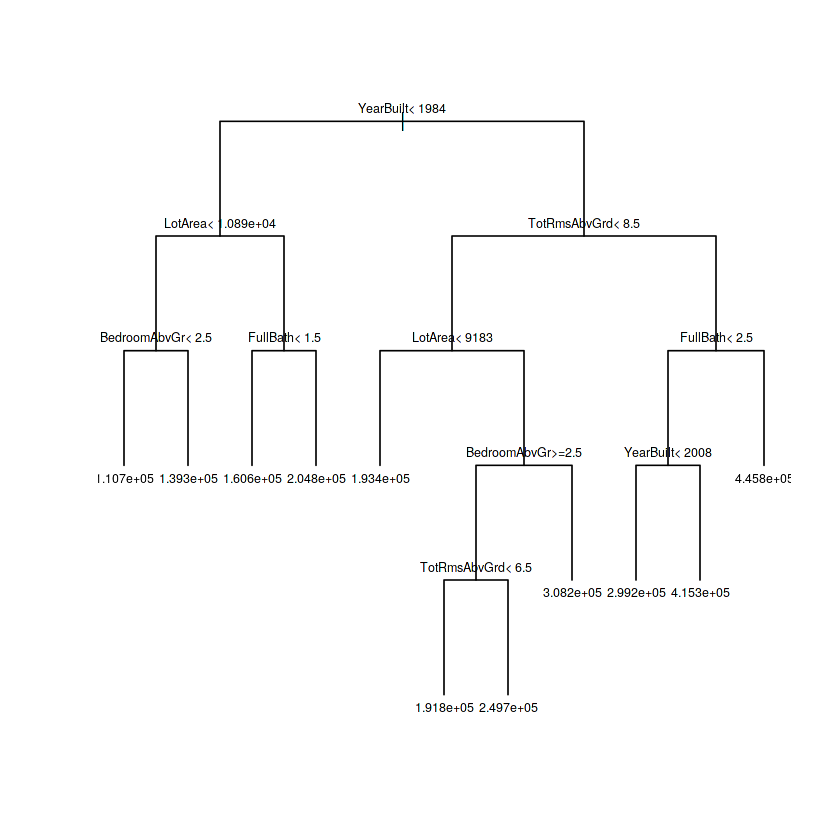

In [37]:
# basic model to predict housing prices in the GTA
fit <- rpart(SalePrice ~ LotArea + YearBuilt + Condition1 + FullBath +
             BedroomAbvGr + TotRmsAbvGrd, data = GTA_data)

# library for building decision trees
library(rpart)

# print a list of the column names
names(GTA_data)

# plot regression tree 
plot(fit, uniform=TRUE)

# add text labels & make them 60% as big as they are by default
text(fit, cex=.6)


# Finding ways to improve the model

In [41]:
# Split training data into test & training sets, wrote more than one to see optimal test/train split ratio
splitData <- resample_partition(GTA_data, c(test = 0.3, train = 0.7))

splitData2 <- resample_partition(GTA_data, c(test = 0.275, train = 0.725))


# Fitting other models to training set to see differences
fit2 <- rpart(SalePrice ~ LotArea + YearBuilt + Condition1 + FullBath +
             BedroomAbvGr + TotRmsAbvGrd + Neighborhood, data = GTA_data)

# and evaluate it on your test set. Did the error get larger or smaller?
mae(model = fit, data = splitData$test)
mae(model = fit2, data = splitData$test)

# when splitting the data into 27.5% for test set and 72.5% for training set, it produces a lower mae 
mae(model = fit, data = splitData2$test)
mae(model = fit2, data = splitData2$test)



[1] 34417.01

[1] 31349.07

[1] 32724.45

[1] 31682.46

# Improving the model

- Implemented *get_mae* function on each to find the ideal number of leaves for GTA data.

In [47]:
# a function to get the maximum average error for a given max depth. You should pass in
# the target as the name of the target column and the predictors as vector where
# each item in the vector is the name of the column
get_mae <- function(maxdepth, target, predictors, training_data, testing_data){
    
    # turn the predictors & target into a formula to pass to rpart()
    predictors <- paste(predictors, collapse="+")
    formula <- as.formula(paste(target,"~",predictors,sep = ""))
    
    # build our model
    model <- rpart(formula, data = training_data,
                   control = rpart.control(maxdepth = maxdepth))
    # get the mae
    mae <- mae(model, testing_data)
    return(mae)
}

In [50]:
# Figuring out the lowest mean average error for this dataset to deal with under/overfitting

# target & predictors
target <- "SalePrice"
predictors <-  c("LotArea","YearBuilt","Condition1","FullBath",
                 "BedroomAbvGr","TotRmsAbvGrd","Neighborhood")

# get the MAE for maxdepths between 1 & 15
for(i in 1:15){
    mae <- get_mae(maxdepth = i, target = target, predictors = predictors,
                  training_data = splitData2$train, testing_data = splitData2$test)
    print(glue::glue("Maxdepth: ",i,"\t MAE: ",mae))
}

Maxdepth: 1	 MAE: 48167.6992928449
Maxdepth: 2	 MAE: 37330.5890609955
Maxdepth: 3	 MAE: 33711.7324330763
Maxdepth: 4	 MAE: 33184.2316367865
Maxdepth: 5	 MAE: 33184.2316367865
Maxdepth: 6	 MAE: 33184.2316367865
Maxdepth: 7	 MAE: 33184.2316367865
Maxdepth: 8	 MAE: 33184.2316367865
Maxdepth: 9	 MAE: 33184.2316367865
Maxdepth: 10	 MAE: 33184.2316367865
Maxdepth: 11	 MAE: 33184.2316367865
Maxdepth: 12	 MAE: 33184.2316367865
Maxdepth: 13	 MAE: 33184.2316367865
Maxdepth: 14	 MAE: 33184.2316367865
Maxdepth: 15	 MAE: 33184.2316367865
